# Balansiranje

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
%matplotlib notebook

## Uvoz podatkov

In [78]:
testno=np.load('LV balansiranje - testno_stanje.npy',allow_pickle=True)
zacetno=np.load('LV balansiranje -zacetno_stanje.npy',allow_pickle=True)

In [79]:
testno = testno.tolist()
zacetno = zacetno.tolist()

In [80]:
data_t=testno['data']
data_z=zacetno['data']
t=np.linspace(0,1,25600)

## Povprečna vrtilna frekvenca

In [421]:
f_vrt=1/((0.943-0.045)/16)
f_vrt #Hz

17.8173719376392

## FFT

In [432]:
A=np.fft.rfft(data_z[:,0])/len(data_z[:,0])
A[1:]*=2
freq=np.fft.rfftfreq(len(data_z[:,0]),d=1/25600)

In [439]:
max_A=np.max(abs(A[:30]))
max_f=np.where(abs(A[:30])==np.max(abs(A[10:30])))

<IPython.core.display.Javascript object>


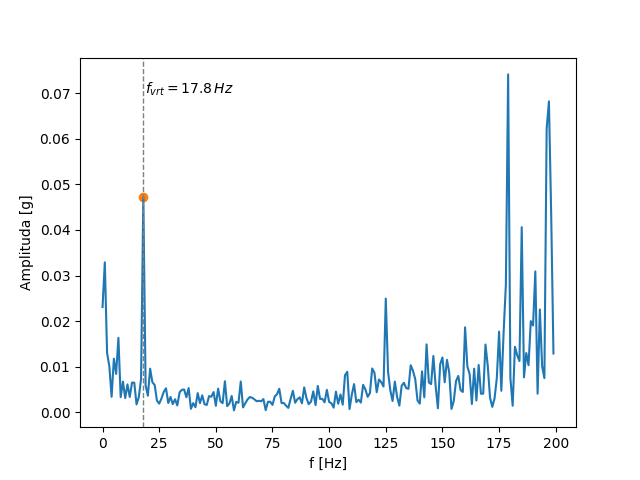

In [462]:
plt.figure()

plt.plot(freq[:200],abs(A)[:200])
plt.scatter(max_f,max_A,color='C1')
plt.axvline(18,linestyle='--',linewidth=1,color='gray')
plt.text(18.8,0.07,'$f_{vrt}=17.8\,Hz$')
plt.xlabel('f [Hz]')
plt.ylabel('Amplituda [g]')
#plt.savefig('balansiranje_ampl_spekter.png',dpi=300)

## Filtriranje

In [320]:
sos = signal.butter(3, (0.9*f_vrt,1.1*f_vrt), 'bandpass', fs=25600, output='sos')
filtered_t = signal.sosfiltfilt(sos, data_t[:,0]*np.hanning(len(data_t[:,0])))
filtered_z = signal.sosfiltfilt(sos, data_z[:,0]*np.hanning(len(data_t[:,0])))

filtered_t_B = signal.sosfiltfilt(sos, data_t[:,1]*np.hanning(len(data_t[:,1])))
filtered_z_B = signal.sosfiltfilt(sos, data_z[:,1]*np.hanning(len(data_t[:,1])))

<IPython.core.display.Javascript object>


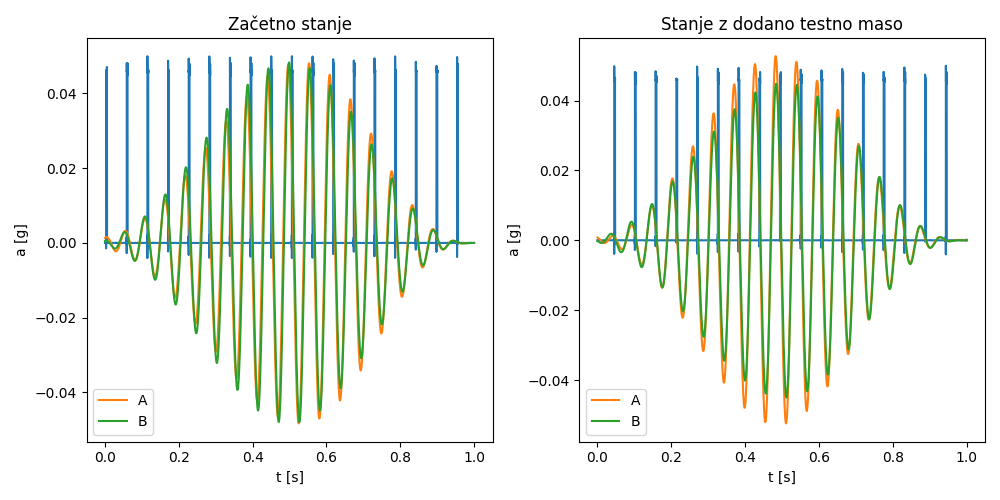

In [422]:
fig, (ax1,ax2) = plt.subplots(1, 2, sharey=False,figsize=(10,5))

ax1.set_title('Začetno stanje')
ax1.plot(t,0.01*data_z[:,2])
ax1.plot(t,filtered_z,label='A')
ax1.plot(t,filtered_z_B,label='B')
ax1.set_xlabel('t [s]')
ax1.set_ylabel('a [g]')
ax1.legend()

ax2.set_title('Stanje z dodano testno maso')
ax2.plot(t,0.01*data_t[:,2])
ax2.plot(t,filtered_t,label='A')
ax2.plot(t,filtered_t_B,label='B')
ax2.set_xlabel('t [s]')
ax2.set_ylabel('a [g]')
ax2.legend()

plt.tight_layout()
#plt.savefig('balansiranje1.png',dpi=300)

## Določitev amplitud in faznih zamikov

In [343]:
zac_A=np.max(filtered_z) #max amplituda
zac_A

0.048054313309440724

In [344]:
zac_B=np.max(filtered_z_B) #max amplituda
zac_B

0.04829277370340608

In [345]:
test_A=np.max(filtered_t) #max amplituda
test_A

0.05272154435797975

In [346]:
test_B=np.max(filtered_t_B) #max amplituda
test_B

0.04481737729184863

In [347]:
faza_A_zac=np.where(filtered_z==np.max(filtered_z))[0][0]/25600
faza_A_zac #lokacija maksimalne amplitude

0.5527734375

In [348]:
faza_B_zac=np.where(filtered_z_B==np.max(filtered_z_B))[0][0]/25600
faza_B_zac #lokacija maksimalne amplitude

0.498671875

In [349]:
faza_A_test=np.where(filtered_t==np.max(filtered_t))[0][0]/25600
faza_A_test #lokacija maksimalne amplitude

0.4828125

In [350]:
faza_B_test=np.where(filtered_t_B==np.max(filtered_t_B))[0][0]/25600
faza_B_test #lokacija maksimalne amplitude

0.4839453125

In [465]:
phi_z=-(0.562-faza_A_zac)*f_vrt*2*np.pi
phi_z #fazni zamik

-1.0329122839336253

In [466]:
phi_z_B=-(0.5065-faza_B_zac)*f_vrt*2*np.pi
phi_z_B #fazni zamik

-0.8763574161739863

In [467]:
phi_t=-(0.4945-faza_A_test)*f_vrt*2*np.pi
phi_t #fazni zamik

-1.3084138668625664

In [468]:
phi_t_B=-(0.4945-faza_B_test)*f_vrt*2*np.pi
phi_t_B #fazni zamik

-1.1815956778952696

## Vektorji

In [469]:
v_0=complex(zac_A*np.cos(phi_z),zac_A*np.sin(phi_z))
v_1=complex(test_A*np.cos(phi_t),test_A*np.sin(phi_t))

In [470]:
v_0_B=complex(zac_B*np.cos(phi_z_B),zac_B*np.sin(phi_z_B))
v_1_B=complex(test_B*np.cos(phi_t_B),test_B*np.sin(phi_t_B))

In [471]:
Q=-v_0/(v_1-v_0)
Qb=-v_0_B/(v_1_B-v_0_B)

<IPython.core.display.Javascript object>


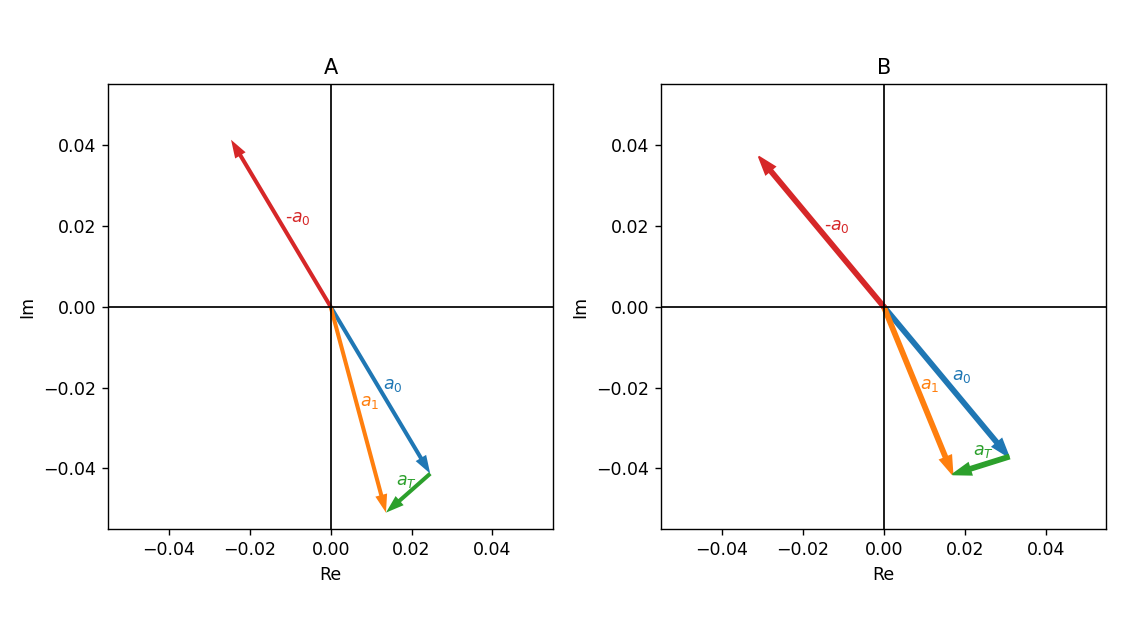

In [502]:
fig, (ax1,ax2) = plt.subplots(1, 2, sharey=False,figsize=(9,5))

ax1.set_title('A')
ax1.axhline(c='black',linewidth=1)
ax1.axvline(c='black',linewidth=1)
ax1.arrow(0,0,v_0.real,v_0.imag,color='C0',label='$a_0$',length_includes_head=True,linewidth=0)
ax1.arrow(0,0,v_1.real,v_1.imag,color='C1',label='$a_1$',length_includes_head=True,linewidth=0)
ax1.arrow(v_0.real,v_0.imag,(v_1.real-v_0.real),(v_1.imag-v_0.imag),length_includes_head=True,color='C2',linewidth=0)
ax1.arrow(0,0,-v_0.real,-v_0.imag,color='C3',label='-$a_0$',length_includes_head=True,linewidth=0)

ax1.text(v_0.real/2+0.0007,v_0.imag/2+0.0004,'$a_0$',c='C0')
ax1.text(-v_0.real/2+0.001,-v_0.imag/2+0.0004,'-$a_0$',c='C3')
ax1.text(v_1.real/2+0.0005,v_1.imag/2+0.001,'$a_1$',c='C1')
ax1.text((v_1.real+v_0.real)/2-0.003,(v_1.imag+v_0.imag)/2+0.002,'$a_T$',c='C2')

ax1.set_xlabel('Re')
ax1.set_ylabel('Im')
ax1.set_aspect('equal')
ax1.set_xlim((-0.055,0.055))
ax1.set_ylim((-0.055,0.055))



ax2.set_title('B')
ax2.axhline(c='black',linewidth=1)
ax2.axvline(c='black',linewidth=1)
ax2.arrow(0,0,v_0_B.real,v_0_B.imag,color='C0',label='v0',length_includes_head=True)
ax2.arrow(0,0,v_1_B.real,v_1_B.imag,color='C1',label='v1',length_includes_head=True)
ax2.arrow(v_0_B.real,v_0_B.imag,(v_1_B.real-v_0_B.real),(v_1_B.imag-v_0_B.imag),length_includes_head=True,color='C2')
ax2.arrow(0,0,-v_0_B.real,-v_0_B.imag,color='C3',label='-v0',length_includes_head=True)

ax2.text(v_0_B.real/2+0.0015,v_0_B.imag/2+0.0004,'$a_0$',c='C0')
ax2.text(-v_0_B.real/2+0.0006,-v_0_B.imag/2+0.0004,'-$a_0$',c='C3')
ax2.text(v_1_B.real/2+0.0005,v_1_B.imag/2+0.0004,'$a_1$',c='C1')
ax2.text((v_1_B.real+v_0_B.real)/2-0.002,(v_1_B.imag+v_0_B.imag)/2+0.0025,'$a_T$',c='C2')

ax2.set_xlabel('Re')
ax2.set_ylabel('Im')

ax2.set_aspect('equal')
ax2.set_xlim((-0.055,0.055))
ax2.set_ylim((-0.055,0.055))


plt.tight_layout()
plt.savefig('balansiranje_vektorji.png',dpi=300)

## Korekcijske mase in lokacije

In [503]:
mu_A=2.8*np.abs(Q)

In [504]:
mu_B=2.8*np.abs(Qb)

In [505]:
alpha_A=np.angle(Q,deg=True)

In [506]:
alpha_B=np.angle(Qb,deg=True)

In [507]:
print(mu_A, alpha_A)
print(mu_B, alpha_B)

9.22227630582837 -100.58086581373159
9.283179540889677 -67.61552079719199
